In [2]:
#!/usr/bin/env python
"""
Tutorial to demonstrate running parameter estimation on a reduced parameter
space for an injected signal.

This example estimates the masses using a uniform prior in both component masses
and distance using a uniform in comoving volume prior on luminosity distance
between luminosity distances of 100Mpc and 5Gpc, the cosmology is Planck15.
"""

import bilby
import numpy as np 
import matplotlib.pyplot as plt

# Set the duration and sampling frequency of the data segment that we're
# going to inject the signal into
duration = 4 # after error: injected signal has a duration in-band of 14.6s, but the data for detector H1 has a duration of 4.0s
sampling_frequency = 2048.0
minimum_frequency = 20

# Specify the output directory and the name of the simulation.
outdir = "outdir_nessai_logUniform2"
label = "fast_tutorial"
bilby.core.utils.setup_logger(outdir=outdir, label=label)

# Set up a random seed for result reproducibility.  This is optional!
bilby.core.utils.random.seed(88170235)

# We are going to inject a binary black hole waveform.  We first establish a
# dictionary of parameters that includes all of the different waveform
# parameters, including masses of the two black holes (mass_1, mass_2),
# spins of both black holes (a, tilt, phi), etc.
injection_parameters = dict(
    mass_1=23.0, #masses from GW190814
    mass_2=20.0,
    a_1=0,# primary dimensionless spin magnitude, we have set it to 0
    a_2=0, #secondary dimensionless spin magnitude
    tilt_1=0.5,
    tilt_2=1.0,
    phi_12=1.7,
    phi_jl=0.3,
    luminosity_distance=2000.0,
    theta_jn=0.4,
    psi=2.659,
    phase=1.3,
    geocent_time=1126259642.413,
    ra=1.375,
    dec=-1.2108, 
    lambdaG = 1e15
)

# Fixed arguments passed into the source model
waveform_arguments = dict(
    waveform_approximant="IMRPhenomXHM", #this waveform approximant needs to be changed since it is just the original XHM
    reference_frequency=50.0,
    minimum_frequency=minimum_frequency,
)

# Create the waveform_generator using a LAL BinaryBlackHole source function
waveform_generator = bilby.gw.WaveformGenerator(
    duration=duration,
    sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_binary_black_hole,
    parameter_conversion=bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters,
    waveform_arguments=waveform_arguments,
)

# Set up interferometers.  In this case we'll use two interferometers
# (LIGO-Hanford (H1), LIGO-Livingston (L1). These default to their design
# sensitivity
ifos = bilby.gw.detector.InterferometerList(["H1", "L1"])
ifos.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency,
    duration=duration,
    start_time=injection_parameters["geocent_time"] - duration,
)
ifos.inject_signal(
    waveform_generator=waveform_generator, parameters=injection_parameters
)


09:01 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
09:01 bilby INFO    : Injected signal in H1:
09:01 bilby INFO    :   optimal SNR = 8.21
09:01 bilby INFO    :   matched filter SNR = 7.75+1.34j
09:01 bilby INFO    :   mass_1 = 23.0
09:01 bilby INFO    :   mass_2 = 20.0
09:01 bilby INFO    :   a_1 = 0
09:01 bilby INFO    :   a_2 = 0
09:01 bilby INFO    :   tilt_1 = 0.5
09:01 bilby INFO    :   tilt_2 = 1.0
09:01 bilby INFO    :   phi_12 = 1.7
09:01 bilby INFO    :   phi_jl = 0.3
09:01 bilby INFO    :   luminosity_distance = 2000.0
09:01 bilby INFO    :   theta_jn = 0.4
09:01 bilby INFO    :   psi = 2.659
09:01 bilby INFO    :   phase = 1.3
09:01 bilby INFO    :   geocent_time = 1126259642.413
09:01 bilby INFO    :   ra = 1.375
09:01 bilby INFO    :   dec = -1.2108
09:01 bilby INFO    :   lambd

[{'plus': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
          6.07862341e-29-7.22320465e-29j,  6.45614906e-29-7.11050659e-29j,
         -6.87378269e-31-3.06624815e-30j]),
  'cross': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -7.20635433e-29-6.05610774e-29j, -7.09378259e-29-6.43295209e-29j,
         -3.13156239e-30+7.02020133e-31j])},
 {'plus': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
          6.07862341e-29-7.22320465e-29j,  6.45614906e-29-7.11050659e-29j,
         -6.87378269e-31-3.06624815e-30j]),
  'cross': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -7.20635433e-29-6.05610774e-29j, -7.09378259e-29-6.43295209e-29j,
         -3.13156239e-30+7.02020133e-31j])}]

Checking injected signals

In [3]:
dir(waveform_generator)

['_WaveformGenerator__parameters',
 '_WaveformGenerator__parameters_from_source_model',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_calculate_strain',
 '_strain_from_model',
 '_strain_from_transformed_model',
 '_times_and_frequencies',
 'duration',
 'frequency_array',
 'frequency_domain_source_model',
 'frequency_domain_strain',
 'parameter_conversion',
 'parameters',
 'sampling_frequency',
 'source_parameter_keys',
 'start_time',
 'time_array',
 'time_domain_source_model',
 'time_domain_strain',
 'waveform_arguments']

In [4]:
#Generate the waveform
waveform_polarizationsf = waveform_generator.frequency_domain_strain(injection_parameters)
waveform_polarizationst = waveform_generator.time_domain_strain(injection_parameters)

In [5]:
 waveform_polarizationst['plus']

array([ 1.05841582e-22,  2.29117116e-22,  1.80058099e-22, ...,
       -2.28345293e-22, -2.21745096e-22, -8.87750418e-23])

/data/og313/lal_bilby/envs/lalsuite-dev/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


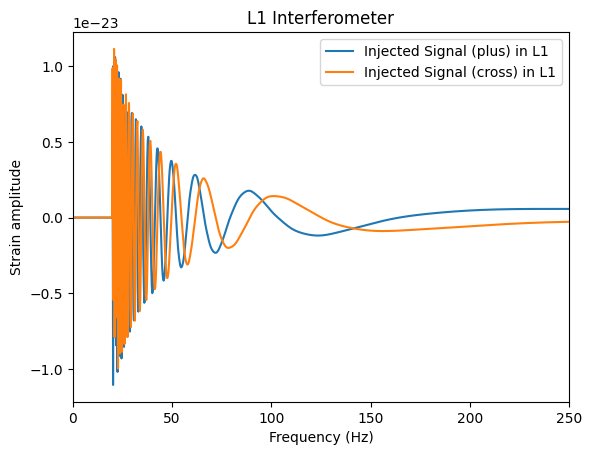

In [6]:
# Plot the injected signal in each interferometer
plt.plot(ifos[1].frequency_array, waveform_polarizationsf['plus'], label="Injected Signal (plus) in L1")
plt.plot(ifos[1].frequency_array, (waveform_polarizationsf['cross']), label="Injected Signal (cross) in L1")

plt.legend()
plt.title(f"{ifos[1].name} Interferometer")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Strain amplitude")
plt.gca().set_xlim(ifos[1].frequency_array[0], ifos[1].frequency_array[1000]) 
plt.show()

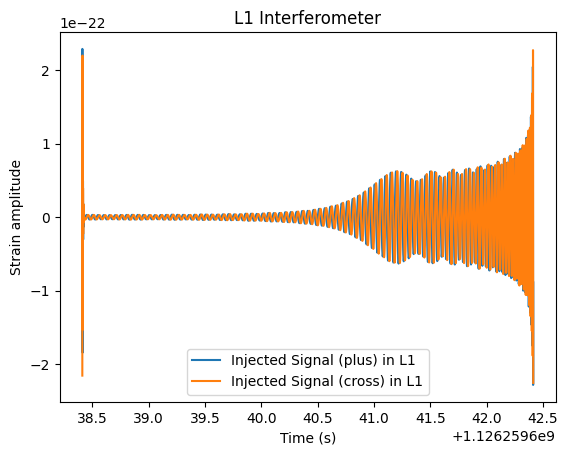

In [7]:
# Plot the injected signal in each interferometer
plt.plot(ifos[1].time_array, waveform_polarizationst['plus'], label="Injected Signal (plus) in L1")
plt.plot(ifos[1].time_array, (waveform_polarizationst['cross']), label="Injected Signal (cross) in L1")

plt.legend()
plt.title(f"{ifos[1].name} Interferometer")
plt.xlabel("Time (s)")
plt.ylabel("Strain amplitude")
#plt.gca().set_xlim(ifos[1].time_array[0], ifos[1].time_array[10000]) 
plt.show()

In [8]:
time = ifos[1].time_array
time[-1] - time[0] # 15 seconsds duration

3.99951171875

In [9]:
time[-1]

1126259642.4125118

In [10]:
injection_parameters["geocent_time"]

1126259642.413

In [11]:
ifos.inject_signal.__doc__

' Inject a signal into noise in each of the three detectors.\n\n        Parameters\n        ==========\n        parameters: dict\n            Parameters of the injection.\n        injection_polarizations: dict\n           Polarizations of waveform to inject, output of\n           `waveform_generator.frequency_domain_strain()`. If\n           `waveform_generator` is also given, the injection_polarizations will\n           be calculated directly and this argument can be ignored.\n        waveform_generator: bilby.gw.waveform_generator.WaveformGenerator\n            A WaveformGenerator instance using the source model to inject. If\n            `injection_polarizations` is given, this will be ignored.\n        raise_error: bool\n            Whether to raise an error if the injected signal does not fit in\n            the segment.\n\n        Notes\n        =====\n        if your signal takes a substantial amount of time to generate, or\n        you experience buggy behaviour. It is preferab

In [12]:
waveform_generator.start_time

0

Checking Prior distributions

In [13]:
priors = bilby.gw.prior.BBHPriorDict()
priors['geocent_time'] = bilby.core.prior.Uniform(
    minimum=injection_parameters['geocent_time'] - 1, #geocent_time: time at which system mergers
    maximum=injection_parameters['geocent_time'] + 1,
    name='geocent_time', latex_label='$t_c$', unit='$s$')
for key in [
    "a_1",
    "a_2",
    "tilt_1",
    "tilt_2",
    "phi_12",
    "phi_jl",
    "theta_jn", #include this to see if do not get the error with theta
    "psi",
    "ra",
    "dec",
    "geocent_time",
    "phase",
    "lambdaG"
]:
    priors[key] = injection_parameters[key]
#priors['lambdaG'] = bilby.core.prior.Uniform(minimum=1e15, maximum=1e19, name='lambdaG', latex_label='$\lambda_G$')

#Try a logUniform prior:


prior_lambdaG = bilby.core.prior.LogUniform(minimum=10**15, maximum=10**50, name='lambdaG', latex_label='$\lambda_G$')

#prior.sample()

09:02 bilby INFO    : No prior given, using default BBH priors in /data/og313/lal_bilby/envs/lalsuite-dev/lib/python3.11/site-packages/bilby/gw/prior_files/precessing_spins_bbh.prior.


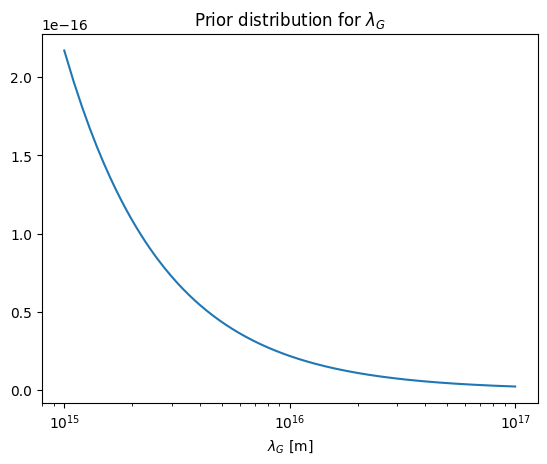

In [20]:
prior_lambdaG = bilby.core.prior.LogUniform(minimum=10**15, maximum= 10**17, name='lambdaG', latex_label='$\lambda_G$')
plt.plot(np.linspace(prior_lambdaG.minimum, prior_lambdaG.maximum, 1000), prior_lambdaG.prob(np.linspace(prior_lambdaG.minimum, prior_lambdaG.maximum, 1000)))
plt.xscale('log')
plt.title('Prior distribution for $\lambda_{G}$')
plt.xlabel('$\lambda_{G}$ [m]')
plt.show()

#if we increase the maximum of the priors to 10**30 the distribution does not look logUniform but like a step function 
         

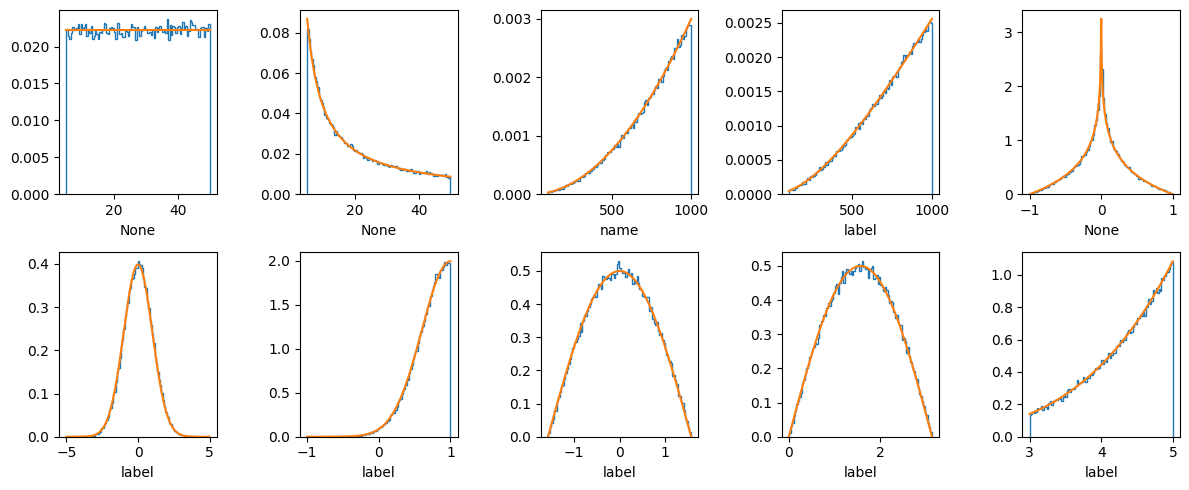

In [56]:
#Example code from https://lscsoft.docs.ligo.org/bilby/making_priors.html on how to plot the priors:

fig = plt.figure(figsize=(12, 5))

priors = [
    bilby.core.prior.Uniform(minimum=5, maximum=50),
    bilby.core.prior.LogUniform(minimum=5, maximum=50),
    bilby.core.prior.PowerLaw(name="name", alpha=2, minimum=100, maximum=1000),
    bilby.gw.prior.UniformComovingVolume(
        name="luminosity_distance", minimum=100, maximum=1000, latex_label="label"
    ),
    bilby.gw.prior.AlignedSpin(),
    bilby.core.prior.Gaussian(name="name", mu=0, sigma=1, latex_label="label"),
    bilby.core.prior.TruncatedGaussian(
        name="name", mu=1, sigma=0.4, minimum=-1, maximum=1, latex_label="label"
    ),
    bilby.core.prior.Cosine(name="name", latex_label="label"),
    bilby.core.prior.Sine(name="name", latex_label="label"),
    bilby.core.prior.Interped(
        name="name",
        xx=np.linspace(0, 10, 1000),
        yy=np.linspace(0, 10, 1000) ** 4,
        minimum=3,
        maximum=5,
        latex_label="label",
    ),
]

for ii, prior in enumerate(priors):
    fig.add_subplot(2, 5, 1 + ii)
    plt.hist(prior.sample(100000), bins=100, histtype="step", density=True)
    if not isinstance(prior, bilby.core.prior.Gaussian):
        plt.plot(
            np.linspace(prior.minimum, prior.maximum, 1000),
            prior.prob(np.linspace(prior.minimum, prior.maximum, 1000)),
        )
    else:
        plt.plot(np.linspace(-5, 5, 1000), prior.prob(np.linspace(-5, 5, 1000)))
    plt.xlabel("{}".format(prior.latex_label))

plt.tight_layout()
plt.show()
plt.close()

In [ ]:
#QUESTIONS:
#What is the reference frequency used for?
